In [1]:
import sys
sys.path.append('..')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from utils.helpers import *
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, GlobalAveragePooling1D
from tensorflow.keras.optimizers import Adam
import warnings
warnings.filterwarnings('ignore')

In [5]:
print("Loading processed data...")
data = load_processed_data('../../data/processed/processed_data.pkl')

Loading processed data...


In [6]:
data

{'X_train': 40359     donald trump vow take travel ban supreme court...
 170749    glutenfree recipe healthier dessert cake pie c...
 555       prevent treat summer chafing men ditch discomf...
 80372     obama double clemency number freeing federal p...
 48277     blac chyna reportedly leaf rob kardashian amid...
                                 ...                        
 123986    overcome stress long distance relationship rel...
 207683    underwear outerwear way show lingerie dignity ...
 146513    get favorite holiday drink festive drink aroun...
 49721     democrat trump nominee show tax several senato...
 56945     alone sometimes good soul sometimes becomes mu...
 Name: cleaned_text, Length: 90157, dtype: object,
 'X_val': 33940     potentially problematic nature trump tax plan ...
 133530               gay teen thrown home arrested tortured
 153324    thing never knew empire state building empire ...
 146296    festival attend die throwing tomato watching b...
 57399     bil

In [7]:
X_train = data['X_train']
X_val = data['X_val']
X_test = data['X_test']
y_train = data['y_train']
y_val = data['y_val']
y_test = data['y_test']
label_encoder = data['label_encoder']

In [8]:
# TF-IDF Vectorization
print("Creating TF-IDF features...")
tfidf_vectorizer = TfidfVectorizer(
    max_features=5000,
    ngram_range=(1, 2),
    stop_words='english'
)

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

print(f"TF-IDF features shape: {X_train_tfidf.shape}")

# Save the vectorizer
save_processed_data(tfidf_vectorizer, 'tfidf_vectorizer.pkl')

Creating TF-IDF features...
TF-IDF features shape: (90157, 5000)


In [9]:
# Support Vector Machine (SVM) Baseline
print("Training SVM model...")
svm_model = SVC(kernel='linear', random_state=42, probability=True)
svm_model.fit(X_train_tfidf, y_train)

Training SVM model...


,C,1.0
,kernel,'linear'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,True
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [10]:
# Evaluate SVM
y_pred_svm = svm_model.predict(X_val_tfidf)
svm_accuracy = accuracy_score(y_val, y_pred_svm)
svm_f1 = f1_score(y_val, y_pred_svm, average='weighted')

In [11]:
print(f"SVM Validation Accuracy: {svm_accuracy:.4f}")
print(f"SVM Validation F1-Score: {svm_f1:.4f}")

SVM Validation Accuracy: 0.7802
SVM Validation F1-Score: 0.7714


In [12]:
# Logistic Regression Baseline
print("Training Logistic Regression model...")
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train_tfidf, y_train)

Training Logistic Regression model...


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,42
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [13]:
# Evaluate Logistic Regression
y_pred_lr = lr_model.predict(X_val_tfidf)
lr_accuracy = accuracy_score(y_val, y_pred_lr)
lr_f1 = f1_score(y_val, y_pred_lr, average='weighted')


In [14]:
print(f"Logistic Regression Validation Accuracy: {lr_accuracy:.4f}")
print(f"Logistic Regression Validation F1-Score: {lr_f1:.4f}")

Logistic Regression Validation Accuracy: 0.7823
Logistic Regression Validation F1-Score: 0.7722


In [15]:
# Simple Neural Network with TF-IDF
print("Training Simple Neural Network...")
nn_model_tfidf = Sequential([
    Dense(512, activation='relu', input_shape=(X_train_tfidf.shape[1],)),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(len(label_encoder.classes_), activation='softmax')
])

nn_model_tfidf.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

Training Simple Neural Network...


In [16]:
# Convert sparse matrices to arrays
X_train_tfidf_dense = X_train_tfidf.toarray()
X_val_tfidf_dense = X_val_tfidf.toarray()

history_tfidf = nn_model_tfidf.fit(
    X_train_tfidf_dense, y_train,
    validation_data=(X_val_tfidf_dense, y_val),
    epochs=20,
    batch_size=32,
    verbose=1
)

Epoch 1/20
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 91s 30ms/step - accuracy: 0.7387 - loss: 0.8140 - val_accuracy: 0.7807 - val_loss: 0.6925
Epoch 2/20
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 78s 28ms/step - accuracy: 0.8299 - loss: 0.5160 - val_accuracy: 0.7814 - val_loss: 0.7067
Epoch 3/20
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9112 - loss: 0.2673 - val_accuracy: 0.7734 - val_loss: 0.8701
Epoch 4/20
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9758 - loss: 0.0745 - val_accuracy: 0.7624 - val_loss: 1.2632
Epoch 5/20
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9938 - loss: 0.0196 - val_accuracy: 0.7614 - val_loss: 1.7244
Epoch 6/20
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 80s 28ms/step - accuracy: 0.9961 - loss: 0.0125 - val_accuracy: 0.7620 - val_loss: 1.9143
Epoch 7/20
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9966 - loss: 0.0106 - val_accuracy: 0.7585 - val_loss: 2.1702
Epoch 8/20
2818/2818 ━━━━━━━━━━━━━━━━━━━━ 79s 28ms/step - accuracy: 0.9974 -

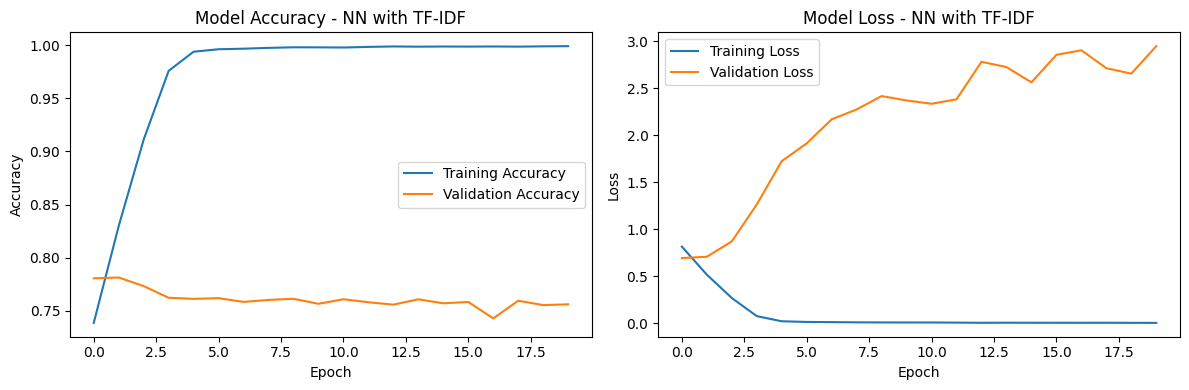

In [17]:
# Plot training history for NN with TF-IDF
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history_tfidf.history['accuracy'], label='Training Accuracy')
plt.plot(history_tfidf.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy - NN with TF-IDF')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history_tfidf.history['loss'], label='Training Loss')
plt.plot(history_tfidf.history['val_loss'], label='Validation Loss')
plt.title('Model Loss - NN with TF-IDF')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

In [18]:
# Evaluate baseline models on test set
print("\n=== FINAL BASELINE MODEL COMPARISON ===")

# SVM Test Evaluation
y_pred_svm_test = svm_model.predict(X_test_tfidf)
svm_test_accuracy = accuracy_score(y_test, y_pred_svm_test)
svm_test_f1 = f1_score(y_test, y_pred_svm_test, average='weighted')

# Logistic Regression Test Evaluation
y_pred_lr_test = lr_model.predict(X_test_tfidf)
lr_test_accuracy = accuracy_score(y_test, y_pred_lr_test)
lr_test_f1 = f1_score(y_test, y_pred_lr_test, average='weighted')

# Neural Network Test Evaluation
nn_test_loss, nn_test_accuracy = nn_model_tfidf.evaluate(X_test_tfidf.toarray(), y_test, verbose=0)
y_pred_nn_test = np.argmax(nn_model_tfidf.predict(X_test_tfidf.toarray()), axis=1)
nn_test_f1 = f1_score(y_test, y_pred_nn_test, average='weighted')

# Results comparison
results_df = pd.DataFrame({
    'Model': ['SVM', 'Logistic Regression', 'Neural Network (TF-IDF)'],
    'Test Accuracy': [svm_test_accuracy, lr_test_accuracy, nn_test_accuracy],
    'Test F1-Score': [svm_test_f1, lr_test_f1, nn_test_f1]
})

print(results_df)


=== FINAL BASELINE MODEL COMPARISON ===
585/585 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step
                     Model  Test Accuracy  Test F1-Score
0                      SVM       0.777980       0.768297
1      Logistic Regression       0.779155       0.769042
2  Neural Network (TF-IDF)       0.757038       0.754290


In [20]:
# Save baseline models
save_processed_data(svm_model, 'svm_baseline.pkl')
save_processed_data(lr_model, 'lr_baseline.pkl')
nn_model_tfidf.save('../data/models/nn_tfidf_baseline.h5')

print("Baseline models saved successfully!")

Baseline models saved successfully!
